# DATA PREPERATION

In [42]:
# Combining and cleaning all our pulls into one

In [75]:
import pandas as pd
review1 = pd.read_csv("/Users/samlepoutre/Documents/slepoutre_icloud/134/Project/tmdb_reviews0to10.csv")  
review2 = pd.read_csv("/Users/samlepoutre/Documents/slepoutre_icloud/134/Project/tmdb_reviews10to20.csv") 
review3 = pd.read_csv("/Users/samlepoutre/Documents/slepoutre_icloud/134/Project/tmdb_df.csv")  


In [76]:


# Manually rename columns in tmdb_df to match tmdb_reviews0to10
column_mapping = {
    "Review": "content",
    "Movie ID": "movie_id",
    "Rating": "rating"
}

review3 = review3.rename(columns=column_mapping)

review3

,movie_id,Movie Title,rating,content
0,58,Pirates of the Caribbean: Dead Man's Chest,8.0,Part 2 introduces Davy Jones. Jack Sparrow has...
1,59,A History of Violence,7.0,"Probably Cronenberg's most mundane work, but t..."
2,62,2001: A Space Odyssey,8.0,I believe that we should call it a modernism s...
3,62,2001: A Space Odyssey,10.0,The eighth wonder of the world. Easily 30+ vie...
4,62,2001: A Space Odyssey,10.0,"Absolute classic, must see, one of the best sc..."
...,...,...,...,...
1452,184551,Into Your Dance,7.0,This was a decent early colour Friz Freleng ca...
1453,184887,Ferrailles,7.0,I really quite enjoyed this. Ir's a bit like t...
1454,185267,The Human Race,4.0,_Death Race_ meets that one episode of _Commun...
1455,185399,The Crunch Bird,6.0,A woman with a wonderfully full head of red ha...


In [77]:
combined_reviews = pd.concat([review1, review2, review3], ignore_index=True)

combined_reviews = combined_reviews.drop(columns=['Movie Title'])
combined_reviews

,movie_id,content,rating
0,3,"Released in 1986, Aki Kaurismaki's <i>Varjoja ...",7.0
1,11,A long time ago in a childhood not too far awa...,10.0
2,11,Star Wars (1977) is a true masterpiece of cine...,10.0
3,11,A quality start to the franchise.\r\n\r\nI say...,9.0
4,11,Everyone and their mother is going to write re...,10.0
...,...,...,...
8767,184551,This was a decent early colour Friz Freleng ca...,7.0
8768,184887,I really quite enjoyed this. Ir's a bit like t...,7.0
8769,185267,_Death Race_ meets that one episode of _Commun...,4.0
8770,185399,A woman with a wonderfully full head of red ha...,6.0


In [78]:
combined_reviews_file = "/Users/samlepoutre/Documents/slepoutre_icloud/134/Project/combined_reviews.csv"
combined_reviews.to_csv(combined_reviews_file, index=False)

In [79]:
combined_reviews

,movie_id,content,rating
0,3,"Released in 1986, Aki Kaurismaki's <i>Varjoja ...",7.0
1,11,A long time ago in a childhood not too far awa...,10.0
2,11,Star Wars (1977) is a true masterpiece of cine...,10.0
3,11,A quality start to the franchise.\r\n\r\nI say...,9.0
4,11,Everyone and their mother is going to write re...,10.0
...,...,...,...
8767,184551,This was a decent early colour Friz Freleng ca...,7.0
8768,184887,I really quite enjoyed this. Ir's a bit like t...,7.0
8769,185267,_Death Race_ meets that one episode of _Commun...,4.0
8770,185399,A woman with a wonderfully full head of red ha...,6.0


In [80]:
def categorize_review(rating):
    if rating > 7:
        return "good"
    elif rating < 5:
        return "bad"

combined_reviews['review_cat'] = combined_reviews['rating'].apply(categorize_review)

combined_reviews

,movie_id,content,rating,review_cat
0,3,"Released in 1986, Aki Kaurismaki's <i>Varjoja ...",7.0,None
1,11,A long time ago in a childhood not too far awa...,10.0,good
2,11,Star Wars (1977) is a true masterpiece of cine...,10.0,good
3,11,A quality start to the franchise.\r\n\r\nI say...,9.0,good
4,11,Everyone and their mother is going to write re...,10.0,good
...,...,...,...,...
8767,184551,This was a decent early colour Friz Freleng ca...,7.0,None
8768,184887,I really quite enjoyed this. Ir's a bit like t...,7.0,None
8769,185267,_Death Race_ meets that one episode of _Commun...,4.0,bad
8770,185399,A woman with a wonderfully full head of red ha...,6.0,None


In [81]:
combined_reviews['review_cat'].value_counts()

review_cat
good    3234
bad      954
Name: count, dtype: int64

In [110]:
combined_reviews_file = "/Users/samlepoutre/Documents/slepoutre_icloud/134/Project/combined_reviews.csv"
combined_reviews.to_csv(combined_reviews_file, index=False)

#combined_reviews = combined_reviews[combined_reviews['review_cat'] != 'None']
combined_reviews = combined_reviews.dropna(subset=['review_cat'])
combined_reviews_beckett = combined_reviews

In [83]:
combined_reviews


,movie_id,content,rating,review_cat
1,11,A long time ago in a childhood not too far awa...,10.0,good
2,11,Star Wars (1977) is a true masterpiece of cine...,10.0,good
3,11,A quality start to the franchise.\r\n\r\nI say...,9.0,good
4,11,Everyone and their mother is going to write re...,10.0,good
5,11,Thinking back to the films that define my gene...,9.0,good
...,...,...,...,...
8761,181812,Went to the first showing in town tonight. I ...,9.0,good
8762,181812,"Bad. Everytime i watched Star Wars, i regret. ...",1.0,bad
8763,181965,The least contemptible entry in the Brotherhoo...,3.0,bad
8764,182469,"Very nice and interesting movie, it mixes tang...",8.0,good


# EDA

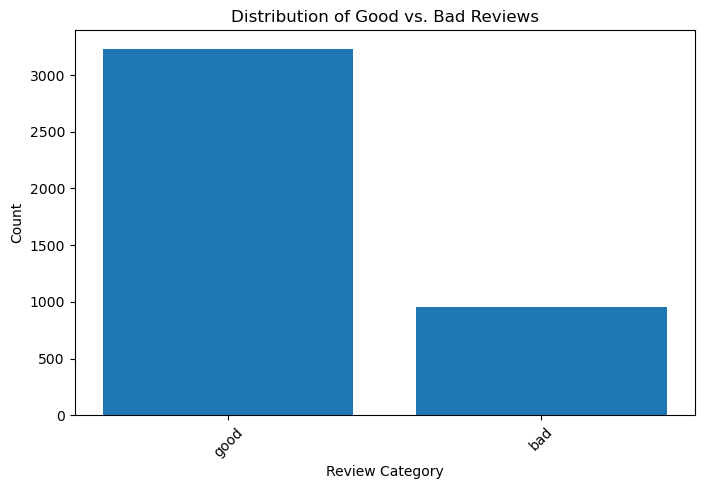

In [84]:
import matplotlib.pyplot as plt

review_counts = combined_reviews['review_cat'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(review_counts.index, review_counts.values)
plt.xlabel("Review Category")
plt.ylabel("Count")
plt.title("Distribution of Good vs. Bad Reviews")
plt.xticks(rotation=45)
plt.show()

In [85]:
# Approx 3k good and 1k bad. Quite imbalanced

In [86]:
# We decided not to include a word limit on reviews since we were only able to pull a few thousand so we wanted to keep as many as possible. 

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/samlepoutre/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


                                             content  \
1  A long time ago in a childhood not too far awa...   
2  Star Wars (1977) is a true masterpiece of cine...   
3  A quality start to the franchise.\r\n\r\nI say...   
4  Everyone and their mother is going to write re...   
5  Thinking back to the films that define my gene...   

                                     cleaned_reviews  
1  [time, ago, childhood, far, away, princess, le...  
2  [star, wars, 1977, true, masterpiece, cinema, ...  
3  [quality, start, franchise, say, start, guess,...  
4  [everyone, mother, going, write, reviews, star...  
5  [thinking, back, films, define, generation, re...  


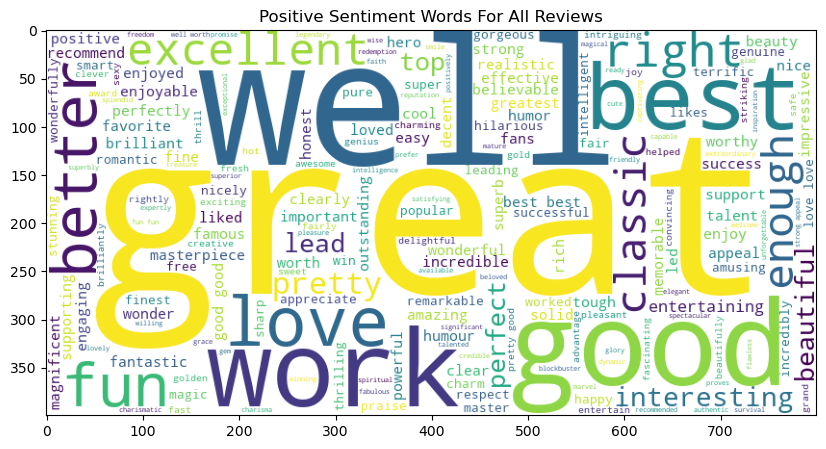

In [120]:
# Beckett
from nltk.corpus import opinion_lexicon
from nltk.tokenize import RegexpTokenizer
nltk.download('opinion_lexicon')
from wordcloud import WordCloud


# Cleaning
def clean_text(text):
    # convert to string and lower case
    text = str(text).lower()

    # regex to remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # tokenize text w/ regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)

    # standard English stopwords
    stop_words = set(stopwords.words('english'))

    # add custom stopwords
    custom_stop_words = set([
        'movie', 'film', 'scene', 'director', 'actor', 
        'thriller', 'comedy', 'drama', 'horror', 
        'cinematography', 'editing', 'score', 'soundtrack', 'screenplay',
        'long', 'short', 'colorful', 'modern',
        'sort of', 'kind of', 'actually', 'basically', 'literally'
    ])
    stop_words.update(custom_stop_words)

    # remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Applying the function
combined_reviews_beckett['cleaned_reviews'] = combined_reviews_beckett['content'].apply(clean_text)

# Display the first few entries
print(combined_reviews_beckett[['content', 'cleaned_reviews']].head())





positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# filter words by sentiment
def filter_words_by_sentiment(words, sentiment_set):
    return [word for word in words if word in sentiment_set]

# concatenate all words in reviews into a single list
all_words = [word for sublist in combined_reviews_beckett['cleaned_reviews'] for word in sublist]

# filter words based on sentiment
positive_review_words = filter_words_by_sentiment(all_words, positive_words)
negative_review_words = filter_words_by_sentiment(all_words, negative_words)

# word clouds
def generate_word_cloud(words, title):
    word_freq = ' '.join(words)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.title(title)
    plt.show()

generate_word_cloud(positive_review_words, 'Positive Sentiment Words For All Reviews')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/samlepoutre/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samlepoutre/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/samlepoutre/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


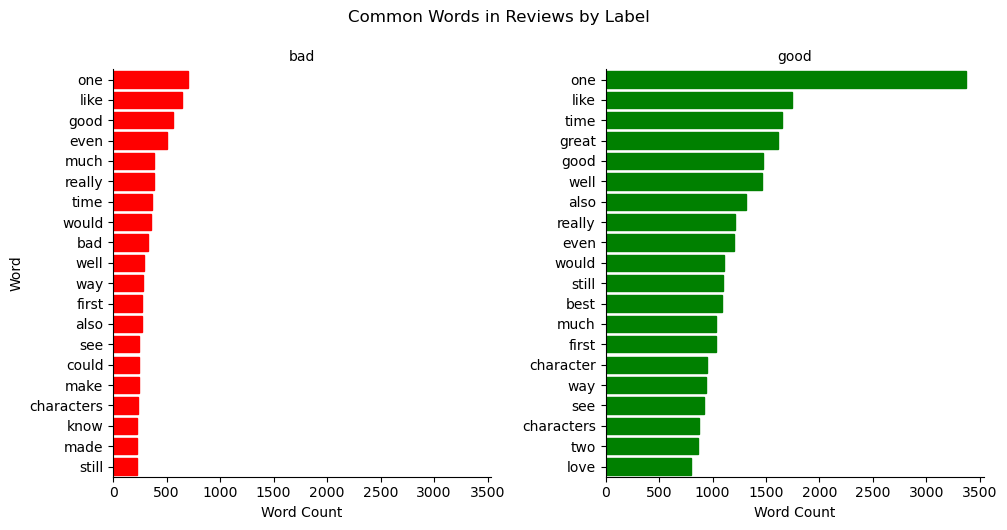

In [122]:
# Karina

import requests
import json
import time
import math
import pandas as pd
import os
import re
import string
import textblob
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


custom_stopwords = {"movie", "film", "cinema", "show", "tv", "story", "films"}
stop_words = set(stopwords.words('english')).union(custom_stopwords)

def clean_and_tokenize(review):
  tokens = word_tokenize(review)
  tokens = [word.lower() for word in tokens]
  tokens = [word for word in tokens if word.isalnum()]
  tokens = [word for word in tokens if not word.isdigit()]
  tokens = [word for word in tokens if word not in stop_words]
  return tokens
  
combined_reviews["cleaned_reviews"] = combined_reviews["content"].apply(clean_and_tokenize)

reviews_exploded = combined_reviews.explode("cleaned_reviews")
reviews_exploded = reviews_exploded.rename(columns={"cleaned_reviews": "word"})

word_counts = reviews_exploded.groupby(["review_cat", "word"]).size().reset_index(name = "n")
word_counts = word_counts.sort_values(["review_cat", "n"], ascending = [True, False])

top_words = word_counts.groupby("review_cat").head(20).reset_index(drop = True)

g = sns.catplot(
    data=top_words,
    x="n", y="word",
    col="review_cat",
    kind="bar",
    height=5,
    aspect=1,
    sharey=False  # Allow different y-axis order per category
)

colors = {
    "bad": "red",
    "good": "green"
}


for ax, cat in zip(g.axes.flat, g.col_names):
    for patch in ax.patches:
        patch.set_color(colors[cat])

g.set_titles("{col_name}")
g.set_axis_labels("Word Count", "Word")
plt.suptitle("Common Words in Reviews by Label", y=1.05)
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samlepoutre/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


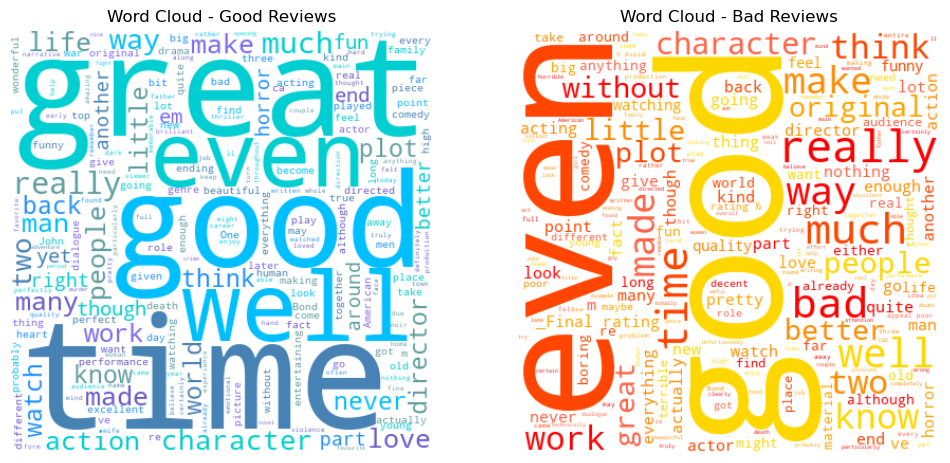

In [127]:
# Ryan

import pandas as pd
import nltk
import random
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import FreqDist
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer




# load data
full_data = pd.read_csv("combined_reviews.csv")
full_data = full_data.dropna(subset=['review_cat'])
#print(full_data.head())


# tokenize all of the words in the reviews
full_data['tokenized_content'] = full_data['content'].apply(lambda x: word_tokenize(str(x)))
full_data = full_data.explode('tokenized_content')


nltk.download('stopwords') # download the stop words ## ONLY NEED TO RUN THIS ONCE
stop_words = set(stopwords.words('english')) # get a premade list of stop words
full_data_filtered = full_data[~full_data['tokenized_content'].isin(stop_words)] # filter out rows with stop words in token columnm
#print(full_data_filtered.head())


# start making some of them word plots
good_reviews = full_data_filtered[full_data_filtered['review_cat'] == 'good'] # filter into good and bad reviews for further analysis
bad_reviews = full_data_filtered[full_data_filtered['review_cat'] == 'bad']


# remove other particular words
words_to_remove = {"movie", "film", "cinema", "s", "n't", "one", ")", "(", ",", "."}
good_reviews = good_reviews[
   ~good_reviews['tokenized_content'].apply(
       lambda tokens: any(word in tokens for word in words_to_remove))]
bad_reviews = bad_reviews[
   ~bad_reviews['tokenized_content'].apply(
       lambda tokens: any(word in tokens for word in words_to_remove))]


# for the good reviews
good_reviews['tokenized_content'] = good_reviews['tokenized_content'].apply(
   lambda x: x if isinstance(x, list) else str(x).split()
)


# drop rows you don't like
good_tokens = good_reviews['tokenized_content'].dropna()


good_string = ' '.join(' '.join(tokens) for tokens in good_tokens) # make the big string
#print(good_string[:500])


# for the bad rows
bad_reviews['tokenized_content'] = bad_reviews['tokenized_content'].apply(
   lambda x: x if isinstance(x, list) else str(x).split()
)


# drop rows you don't like
bad_tokens = bad_reviews['tokenized_content'].dropna()


bad_string = ' '.join(' '.join(tokens) for tokens in bad_tokens) # make the big string
#print(bad_string[:500])


plt.figure(figsize=(12, 6))


def cold_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
   return random.choice(["#1E90FF", "#4682B4", "#5F9EA0", "#00CED1", "#00BFFF", "#6A5ACD", "#7B68EE"]) # cold colors for da good words


# good reviews word cloud
plt.subplot(1, 2, 1)
wordcloud_good = WordCloud(width=400, height=400, background_color='white').generate(good_string)
wordcloud_good.recolor(color_func=cold_color_func) # recolor the bad word cloud
plt.imshow(wordcloud_good, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Good Reviews")


def warm_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
   return random.choice(["#FF4500", "#FF6347", "#FF8C00", "#FFD700", "#FFA500", "#FF0000"])  # Various shades of red, orange, yellow


# bad reviews word cloud
plt.subplot(1, 2, 2)
wordcloud_bad = WordCloud(width=400, height=400, background_color='white').generate(bad_string)
wordcloud_bad.recolor(color_func=warm_color_func) # recolor the bad word cloud
plt.imshow(wordcloud_bad, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Bad Reviews")


# Display the word clouds
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samlepoutre/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


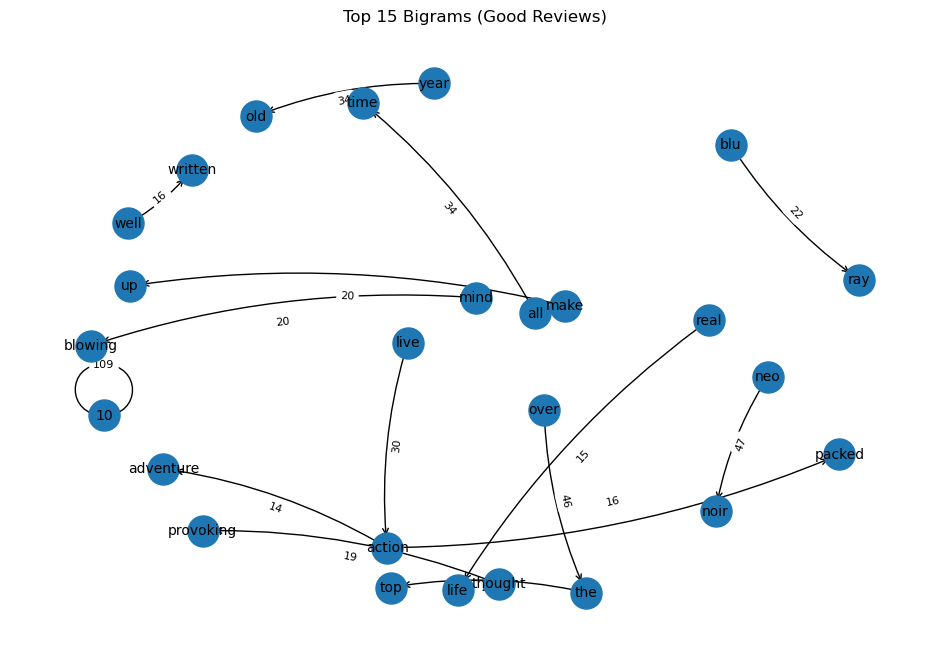

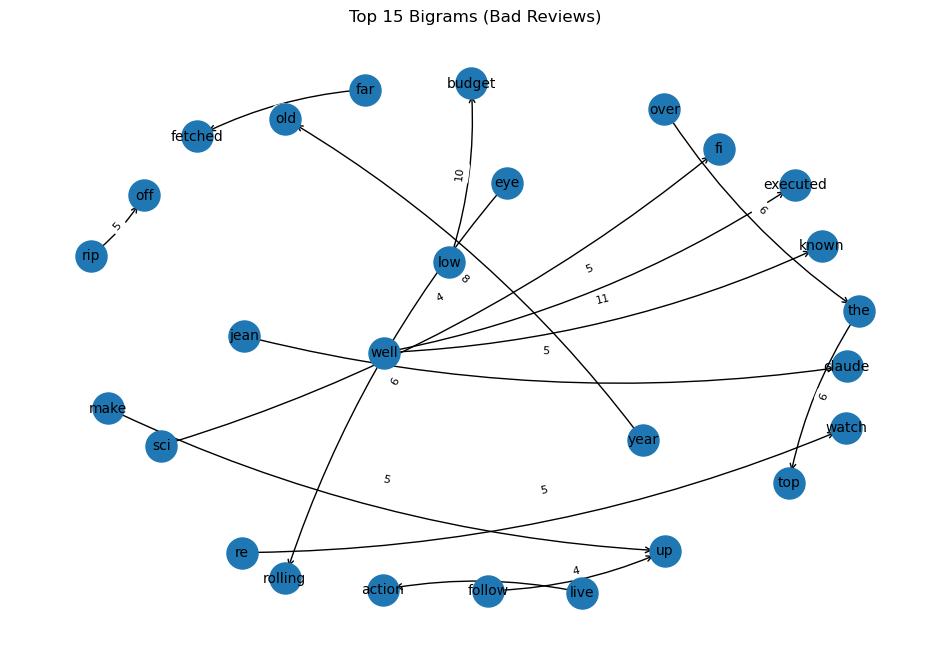

In [128]:
# Ryan

import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from nltk import FreqDist
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter


# load data
full_data = pd.read_csv("combined_reviews.csv")
full_data = full_data.dropna(subset=['review_cat'])
#print(full_data.head())


# tokenize all of the words in the reviews
full_data['tokenized_content'] = full_data['content'].apply(lambda x: word_tokenize(str(x)))
full_data = full_data.explode('tokenized_content')


nltk.download('stopwords') # download the stop words ## ONLY NEED TO RUN THIS ONCE
stop_words = set(stopwords.words('english')) # get a premade list of stop words
full_data_filtered = full_data[~full_data['tokenized_content'].isin(stop_words)] # filter out rows with stop words in token columnm
#print(full_data_filtered.head())


# start making some of them word plots
good_reviews = full_data_filtered[full_data_filtered['review_cat'] == 'good'] # filter into good and bad reviews for further analysis
bad_reviews = full_data_filtered[full_data_filtered['review_cat'] == 'bad']


# remove other particular words
words_to_remove = {"movie", "film", "cinema", "s", "n't", "one", ")", "(", ",", "."}
good_reviews = good_reviews[
   ~good_reviews['tokenized_content'].apply(
       lambda tokens: any(word in tokens for word in words_to_remove))]
bad_reviews = bad_reviews[
   ~bad_reviews['tokenized_content'].apply(
       lambda tokens: any(word in tokens for word in words_to_remove))]


# for the good reviews
good_reviews['tokenized_content'] = good_reviews['tokenized_content'].apply(
   lambda x: x if isinstance(x, list) else str(x).split()
)


# drop rows you don't like
good_tokens = good_reviews['tokenized_content'].dropna()


good_string = ' '.join(' '.join(tokens) for tokens in good_tokens) # make the big string
#print(good_string[:500])


# for the bad rows
bad_reviews['tokenized_content'] = bad_reviews['tokenized_content'].apply(
   lambda x: x if isinstance(x, list) else str(x).split()
)


# this is the bigram section


# make list versions of the the good and bad words
good_tokens_flat = [
   token
   for tokens in good_reviews['tokenized_content'].dropna()
   for token in tokens
]
bad_tokens_flat = [
   token
   for tokens in bad_reviews['tokenized_content'].dropna()
   for token in tokens
]


def token_lists_to_docs(token_lists): # turn the lists into big strings
   return [" ".join(tokens) for tokens in token_lists.dropna()]


good_docs = token_lists_to_docs(good_reviews['tokenized_content'])
bad_docs  = token_lists_to_docs(bad_reviews['tokenized_content'])


# For GOOD reviews
vectorizer_good = CountVectorizer(ngram_range=(2, 2))
X_good = vectorizer_good.fit_transform(good_docs)  # document-term matrix
good_feature_names = vectorizer_good.get_feature_names_out()


# Sum counts across all documents to get global frequency
good_counts = X_good.sum(axis=0).A1  # .A1 flattens to 1D array
good_bigram_freq = list(zip(good_feature_names, good_counts))
# Sort by frequency descending
good_bigram_freq_sorted = sorted(good_bigram_freq, key=lambda x: x[1], reverse=True)


# For BAD reviews
vectorizer_bad = CountVectorizer(ngram_range=(2, 2))
X_bad = vectorizer_bad.fit_transform(bad_docs)
bad_feature_names = vectorizer_bad.get_feature_names_out()


bad_counts = X_bad.sum(axis=0).A1
bad_bigram_freq = list(zip(bad_feature_names, bad_counts))
bad_bigram_freq_sorted = sorted(bad_bigram_freq, key=lambda x: x[1], reverse=True)


def plot_bigram_graph(bigram_list, top_n=10, title="Bigrams Graph"):
   # Slice the top N
   top_bigrams = bigram_list[:top_n]
  
   # Create a directed graph
   G = nx.DiGraph()
  
   # Add edges for each bigram
   for bigram, freq in top_bigrams:
       w1, w2 = bigram.split(" ", 1)
       G.add_edge(w1, w2, weight=freq)
  
   # Layout for positioning
   # - k: The optimal distance between nodes. Larger k => more spread out nodes.
   # - scale: The overall scale of the layout.
   # - iterations: How many times the layout algorithm iterates.
   # - seed: Makes the layout reproducible.
   pos = nx.spring_layout(G, k=5.0, scale=3.0, iterations=100, seed=3132025)
  
   # Plot
   plt.figure(figsize=(12, 8))
  
   # Draw nodes
   nx.draw_networkx_nodes(G, pos, node_size=500)
  
   # Draw edges (directed arrows)
   nx.draw_networkx_edges(
       G, pos,
       arrows=True,
       arrowstyle="->",
       connectionstyle="arc3,rad=0.1"
   )
  
   # Draw labels for nodes
   nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
  
   # Edge labels for frequencies
   edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
   nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
  
   plt.title(title)
   plt.axis('off')
   plt.show()
  


# Plot top 10 bigrams for GOOD reviews
plot_bigram_graph(
   bigram_list=good_bigram_freq_sorted,
   top_n=15,
   title="Top 15 Bigrams (Good Reviews)"
)


# Plot top 10 bigrams for BAD reviews
plot_bigram_graph(
   bigram_list=bad_bigram_freq_sorted,
   top_n=15,
   title="Top 15 Bigrams (Bad Reviews)"
)


# pretty much works but could use some tweaking




# MODEL BUILDING

In [88]:
import sklearn
import numpy 
import nltk 
import textblob 
import matplotlib

combined_reviews

,movie_id,content,rating,review_cat
1,11,A long time ago in a childhood not too far awa...,10.0,good
2,11,Star Wars (1977) is a true masterpiece of cine...,10.0,good
3,11,A quality start to the franchise.\r\n\r\nI say...,9.0,good
4,11,Everyone and their mother is going to write re...,10.0,good
5,11,Thinking back to the films that define my gene...,9.0,good
...,...,...,...,...
8761,181812,Went to the first showing in town tonight. I ...,9.0,good
8762,181812,"Bad. Everytime i watched Star Wars, i regret. ...",1.0,bad
8763,181965,The least contemptible entry in the Brotherhoo...,3.0,bad
8764,182469,"Very nice and interesting movie, it mixes tang...",8.0,good


In [89]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Preprocess function to clean text
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    stop_words = set(stopwords.words('english'))
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stop words
    return text

# Apply the preprocessing function
combined_reviews['cleaned_text'] = combined_reviews['content'].apply(preprocess_text)
combined_reviews.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samlepoutre/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/mt/9hm4wwlj3qj8hw77vk443_280000gn/T/ipykernel_65101/3296004624.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_reviews['cleaned_text'] = combined_reviews['content'].apply(preprocess_text)


,movie_id,content,rating,review_cat,cleaned_text
1,11,A long time ago in a childhood not too far awa...,10.0,good,long time ago childhood far away princess leia...
2,11,Star Wars (1977) is a true masterpiece of cine...,10.0,good,star wars true masterpiece cinema definitely o...
3,11,A quality start to the franchise.\r\n\r\nI say...,9.0,good,quality start franchise say start guess depend...
4,11,Everyone and their mother is going to write re...,10.0,good,everyone mother going write reviews star wars ...
5,11,Thinking back to the films that define my gene...,9.0,good,thinking back films define generation recall q...


In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Transform the text data into TF-IDF features
X = tfidf.fit_transform(combined_reviews['cleaned_text']).toarray()

In [94]:
# For simplicity, let's assume any rating >= 4 is positive, 3 is neutral, and <= 2 is negative
combined_reviews['sentiment'] = combined_reviews['rating'].apply(lambda x: 1 if x >= 8 else -1)
y = combined_reviews['sentiment']

# remember to unremove the NAs for neutral
#combined_reviews['sentiment'] = combined_reviews['review_rating'].apply(lambda x: 1 if x >= 8 else (-1 if x <= 4 else 0))
#y = combined_reviews['sentiment']

/var/folders/mt/9hm4wwlj3qj8hw77vk443_280000gn/T/ipykernel_65101/90725152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_reviews['sentiment'] = combined_reviews['rating'].apply(lambda x: 1 if x >= 8 else -1)


In [100]:
set.seed(3132025)
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

AttributeError: type object 'set' has no attribute 'seed'

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report: \n {classification_report(y_test, y_pred)}')

Accuracy: 0.8496420047732697
Classification Report: 
               precision    recall  f1-score   support

          -1       0.94      0.34      0.50       185
           1       0.84      0.99      0.91       653

    accuracy                           0.85       838
   macro avg       0.89      0.67      0.71       838
weighted avg       0.86      0.85      0.82       838



In [97]:
def predict_sentiment(review):
    review_cleaned = preprocess_text(review)
    review_tfidf = tfidf.transform([review_cleaned]).toarray()
    sentiment = model.predict(review_tfidf)[0]
    if sentiment == 1:
        return "Positive"
    elif sentiment == -1:
        return "Negative"
    else:
        return "Neutral"

# Test the model on new reviews
new_review = "This product is amazing and works perfectly!"
print(f'Review: {new_review}')
print(f'Sentiment: {predict_sentiment(new_review)}')

Review: This product is amazing and works perfectly!
Sentiment: Positive


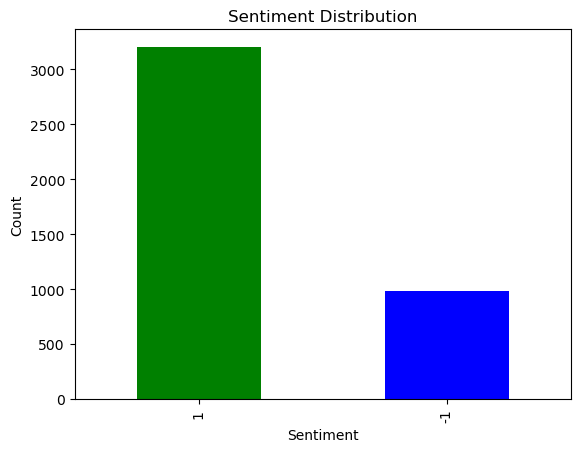

In [99]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
combined_reviews['sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()